In [1]:
# importing required packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
# Loading the data
data = pd.read_csv("data.csv")
data.head()

,No.,phi,Ha,Ra,Nu
0,1,0.01,0,1000,6.180
1,2,0.01,0,10000,6.412
2,3,0.01,0,100000,8.348
3,4,0.01,0,1000000,11.716
4,5,0.01,20,1000,6.179


In [3]:
# Features and target
X = data[['phi', 'Ha', 'Ra']].values
y = data['Nu'].values

In [4]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(3,)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

C:\Users\ashik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# training model
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=4,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 54.5377 - mae: 7.1568 - val_loss: 62.2295 - val_mae: 7.5945
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.7488 - mae: 6.5608 - val_loss: 53.5347 - val_mae: 6.9550
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.2605 - mae: 5.8357 - val_loss: 43.9713 - val_mae: 6.1665
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.9122 - mae: 4.9092 - val_loss: 33.7236 - val_mae: 5.1707
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.8401 - mae: 3.8045 - val_loss: 24.2210 - val_mae: 4.0335
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.9974 - mae: 2.6517 - val_loss: 16.9295 - val_mae: 3.1645
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8217 - mae: 2.1288 - val_loss: 12.7250 - val_mae: 2.6527
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9123 - mae: 1.9326 - val_loss: 9.5500 - val_mae: 2.2834
Epoch 9/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

In [8]:
# mae of test data
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae:.4f}")

Test MAE: 0.1564


In [9]:
# Example: phi=0.01, Ha=50, Ra=1e5
new_data = np.array([[0.01, 50, 1e5]])
new_data_scaled = scaler.transform(new_data)

predicted_Nu = model.predict(new_data_scaled)
print(f"Predicted Nu: {predicted_Nu[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Nu: 6.8294


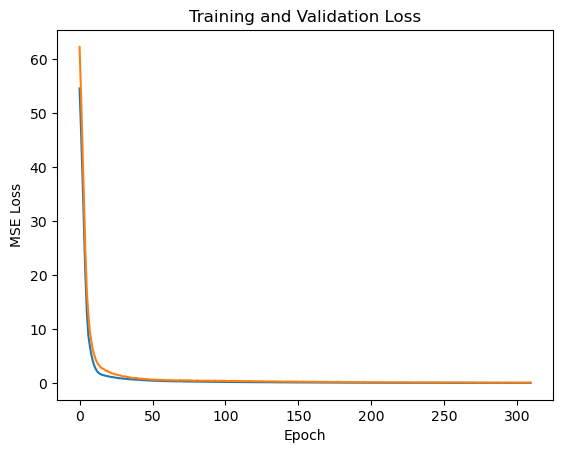

In [10]:
# training and validation loss of training data
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training and Validation Loss")
plt.show()

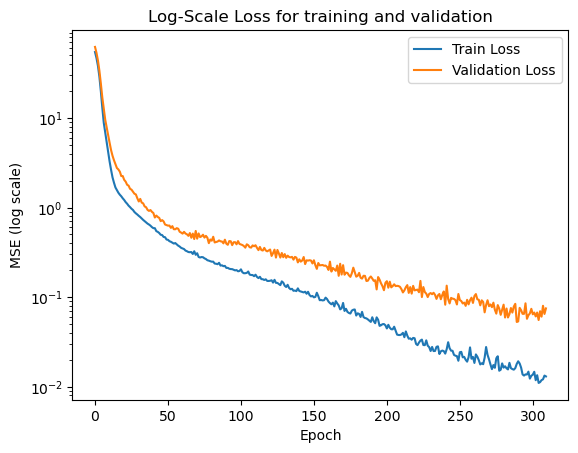

In [11]:
# log loss of train and test data
plt.figure()
plt.semilogy(history.history['loss'], label='Train Loss')
plt.semilogy(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE (log scale)")
plt.title("Log-Scale Loss for training and validation")
plt.legend()
plt.show()

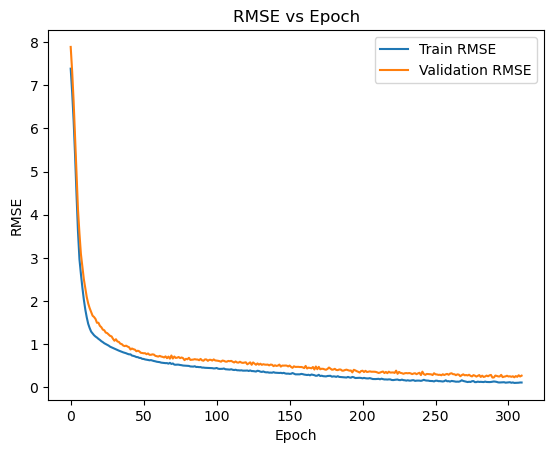

In [12]:
# Error vs Epoch (RMSE)
train_rmse = np.sqrt(history.history['loss'])
test_rmse = np.sqrt(history.history['val_loss'])

plt.figure()
plt.plot(train_rmse, label='Train RMSE')
plt.plot(test_rmse, label='Validation RMSE')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE vs Epoch")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


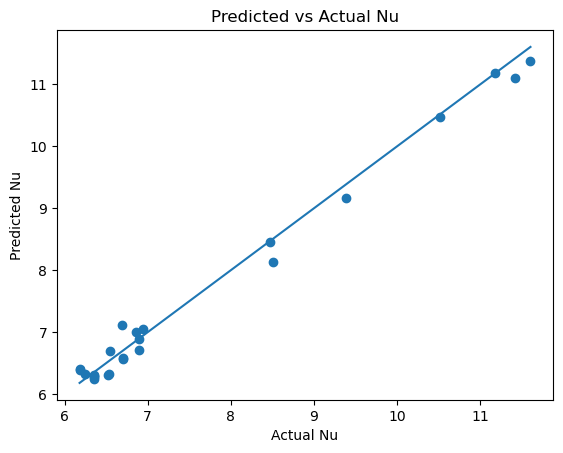

In [13]:
# test data prediction
y_test_pred = model.predict(X_test).flatten()

plt.figure()
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("Predicted vs Actual Nu")
plt.show()

In [14]:
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()
# R2 calculation
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


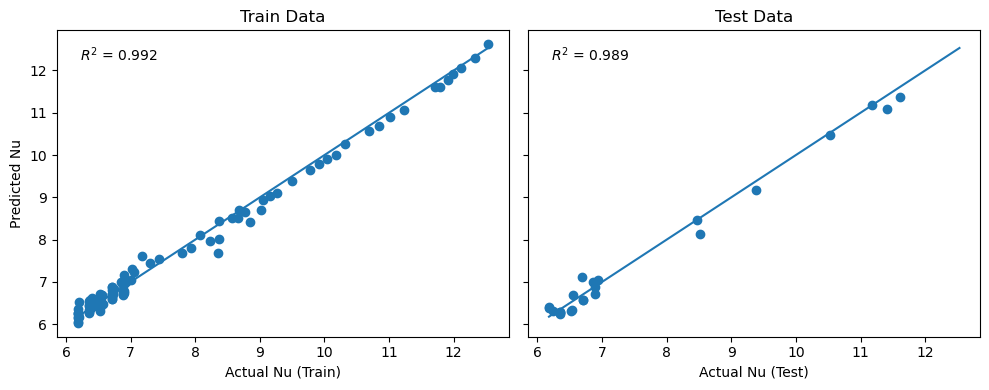

In [15]:
# train vs test
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Train 
plt.sca(axes[0])
plt.scatter(y_train, y_train_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("Actual Nu (Train)")
plt.ylabel("Predicted Nu")
plt.title("Train Data")
plt.text(
    0.05, 0.90, f"$R^2$ = {r2_train:.3f}",
    transform=axes[0].transAxes,
    fontsize=10
)

# Test 
plt.sca(axes[1])
plt.scatter(y_test, y_test_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("Actual Nu (Test)")
plt.title("Test Data")
plt.text(
    0.05, 0.90, f"$R^2$ = {r2_test:.3f}",
    transform=axes[1].transAxes,
    fontsize=10
)

plt.tight_layout()
plt.show()

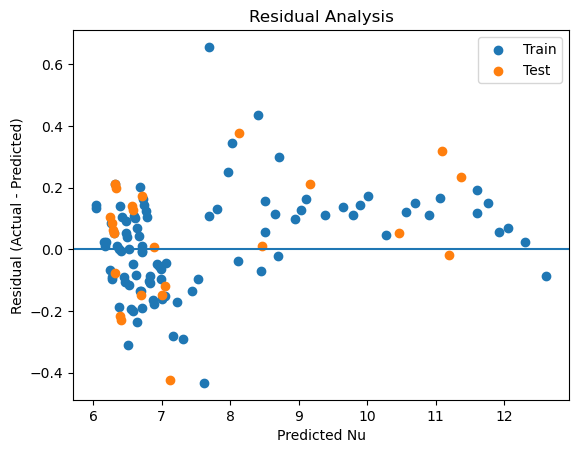

In [16]:
# Residuals (Train vs Test)
plt.figure()
plt.scatter(y_train_pred, y_train - y_train_pred, label='Train')
plt.scatter(y_test_pred, y_test - y_test_pred, label='Test')
plt.axhline(0)
plt.xlabel("Predicted Nu")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Analysis")
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


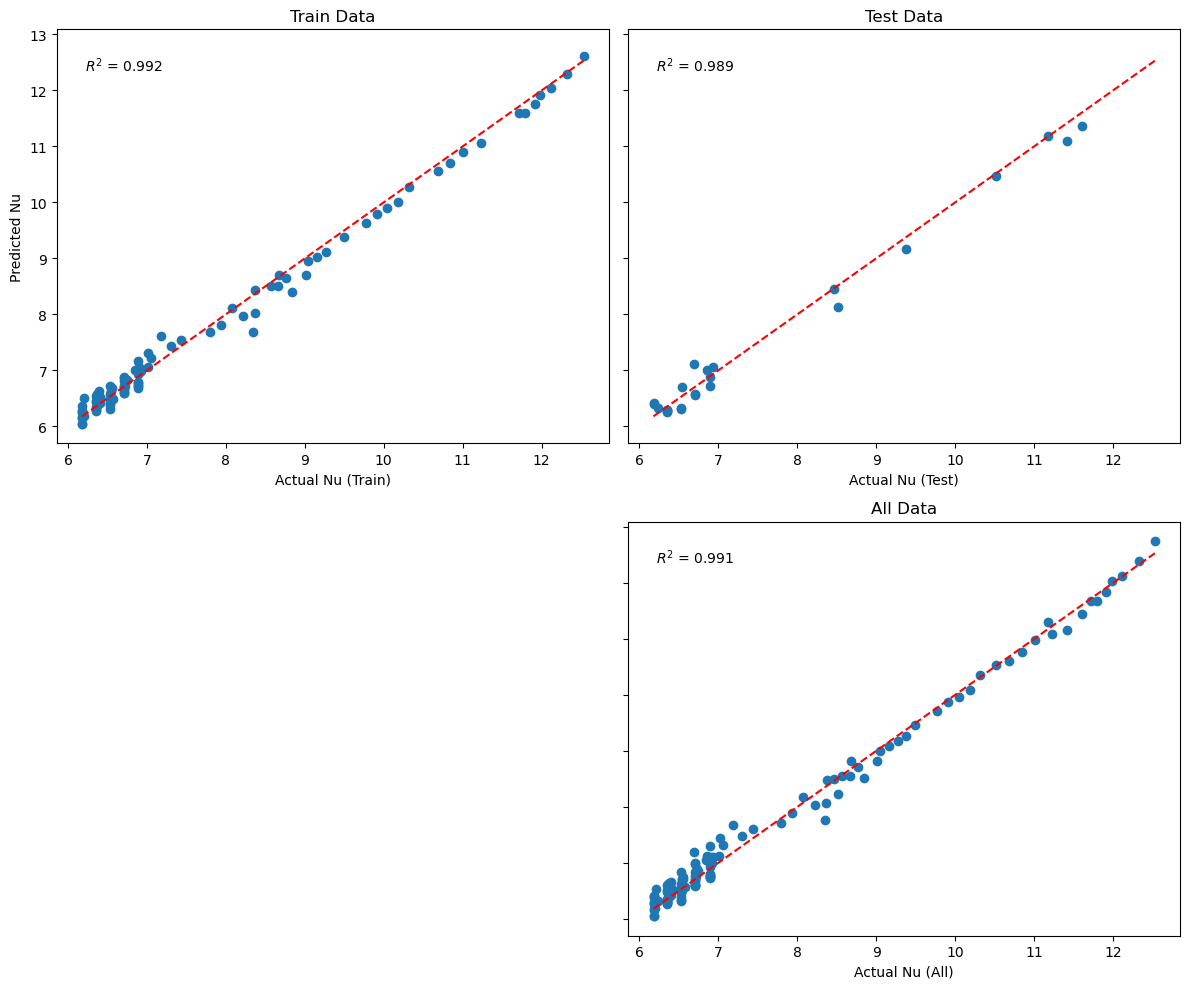

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# Train
plt.sca(axes[0, 0])
plt.scatter(y_train, y_train_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Nu (Train)")
plt.ylabel("Predicted Nu")
plt.title("Train Data")
plt.text(0.05, 0.90, f"$R^2$ = {r2_train:.3f}", transform=axes[0, 0].transAxes, fontsize=10)

# Test
plt.sca(axes[0, 1])
plt.scatter(y_test, y_test_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Nu (Test)")
plt.title("Test Data")
plt.text(0.05, 0.90, f"$R^2$ = {r2_test:.3f}", transform=axes[0, 1].transAxes, fontsize=10)

# Empty or placeholder
axes[1, 0].axis('off')

# All data
y_pred = model.predict(scaler.fit_transform(X)).flatten()
r2_all  = r2_score(y, y_pred)
plt.sca(axes[1, 1])
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Nu (All)")
plt.title("All Data")
plt.text(0.05, 0.90, f"$R^2$ = {r2_all:.3f}", transform=axes[1, 1].transAxes, fontsize=10)

plt.tight_layout()
plt.show()
